## Boston house prices prediction using 'scikit-learn':

The goal of this notebook is to familiarise machine learning concepts using Boston House prices dataset from scikit learn library.

**Introduction:**
<br>Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. (Ref: Wikipedia)
    
**Dependencies:**
1. Python 3.7+
2. numpy, pandas, scikit-learn libraries installed
3. IDE that opens .ipnyb files eg: Jupyter



**Supervised Machine Learning:**
    It is a type of Machine Learning where a target variable is predicted from input variables by estimating the underlying function f(x) through various techniques.

Here, we work with various supervised machine learning algorithm to predict the price of a house in boston.

**Dataset:** The dataset is taken from scikit-learn library as it already comes as a builtin. So we manipulate the data by cleaning and preparing for our prediction.

**Data Science Pipeline:** A typical data science process or pipelines has a set of iterative operations involved and we flip back and forth in the pipeline, as a result we achieve a model serving the business purpose to it's best. Below is a popular data science pipeline called CRISP-DM.

<img src=https://cdn-images-1.medium.com/max/800/0*yt4EAnw2EfixSEJW.png>
<center>CRISP-DM Process (Image credit: KDnuggets)

So, we will start my importing necessary libraries.

In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import seaborn as sns
from scipy.stats import probplot
import matplotlib.pyplot as plt

The dataset is available as load_boston() in scikit-learn datasets. When viewed, it is a dictionary with data, target variable, column names are present. We would clean it to create a tidy pandas dataframe.

In [2]:
# How it is stored in the library
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# assigning it to 'boston'
boston = load_boston()

What we do is, create a DataFrame with data as the data array stored in the above dictionary, column names as feature_names and a new column called target or price. So let me explain what each column actually mean in the dataset.

In [4]:
boston_df = pd.DataFrame(data = boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Dataset information:**

Number of instances: 506

Number of attributes or columns: 14

Attribute information:

1. CRIM per capita crime rate by town

2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS proportion of non-retail business acres per town

4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX nitric oxides concentration (parts per 10 million)

6. RM average number of rooms per dwelling

7. AGE proportion of owner-occupied units built prior to 1940

8. DIS weighted distances to five Boston employment centres

9. RAD index of accessibility to radial highways

10. TAX full-value property-tax rate per $10,000

11. PTRATIO pupil-teacher ratio by town

12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13. LSTAT % lower status of the population

14. MEDV Median value of owner-occupied homes in $1000’s

In [5]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


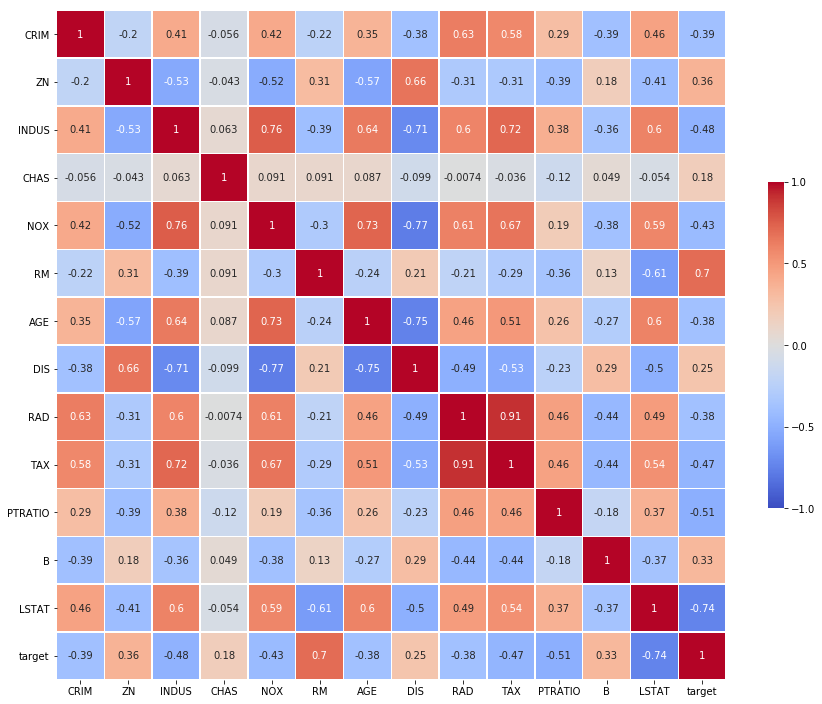

In [6]:
f, ax = plt.subplots(figsize = (15,20))
sns.heatmap(boston_df.corr(), 
            annot=True, 
            square=True,
            cmap='coolwarm',
            cbar_kws={'shrink': 0.3,
                     'ticks': [-1, -0.5, 0, 0.5, 1]},
            linewidths=0.5,
            vmin=-1,
            vmax=1,
            annot_kws={'size': 10})

ax.set_yticklabels(boston_df.corr().columns, rotation = 0)
ax.set_xticklabels(boston_df.corr().columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Let's try to create a machine learning(regression) model and evaluate the performance. 

We need to first split the data into training and testing data.

In [25]:
boston_df_X = boston_df[boston_df.columns[:-1]]
boston_df_y = boston_df[[boston_df.columns[-1]]]
print(boston_df_y)
print(boston_df_X)

     target
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
..      ...
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9

[506 rows x 1 columns]
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.

In [54]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(boston_df_X, boston_df_y, test_size = 0.33, random_state=32)

# Training the regression model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Predicting using the regression model
boston_pred = reg.predict(X_test)
print("Predictions: \n", boston_pred)

Predictions: 
 [[15.2793709 ]
 [28.49379577]
 [ 9.84842817]
 [22.5798193 ]
 [21.12641727]
 [29.15208006]
 [20.83425495]
 [25.42294476]
 [20.85975454]
 [20.52689256]
 [35.52371328]
 [20.92089487]
 [18.92689624]
 [17.75430911]
 [27.5220891 ]
 [21.25990212]
 [28.73632809]
 [16.32915085]
 [22.47986626]
 [15.94770059]
 [19.85778133]
 [19.24993156]
 [40.93965364]
 [17.58180065]
 [43.24400287]
 [12.1865612 ]
 [25.54133455]
 [15.8562014 ]
 [22.38229186]
 [17.10101716]
 [28.12489551]
 [26.66007379]
 [36.84140012]
 [21.0948381 ]
 [23.10569507]
 [23.19829756]
 [32.99059487]
 [18.50574602]
 [27.61883373]
 [21.96638455]
 [28.64881204]
 [23.31427311]
 [23.50858322]
 [11.84967519]
 [36.26349897]
 [20.26659674]
 [21.10847996]
 [27.14000631]
 [20.94319382]
 [24.70193631]
 [22.38952069]
 [31.85483275]
 [19.68459598]
 [13.56676657]
 [19.65189197]
 [21.35458678]
 [22.82872807]
 [16.415419  ]
 [38.42192899]
 [16.86513646]
 [39.3306569 ]
 [14.26950232]
 [25.43582221]
 [13.42930391]
 [19.66636538]
 [19.48673

#### Viewing the model parameters

In [56]:
# coefficients of each attribute in the linear regression
print("Coefficients: \n", reg.coef_)

# Intercept of the model
print("Intercept: \n", reg.intercept_)

Coefficients: 
 [[-1.17178051e-01  4.99139562e-02  8.50817242e-03  1.12061356e+00
  -1.53490831e+01  3.67684976e+00 -3.34921938e-03 -1.39950838e+00
   2.87739468e-01 -1.24298990e-02 -9.04299479e-01  9.72040166e-03
  -4.98523078e-01]]
Intercept: 
 [35.16763948]


#### Evaluating the model

In [46]:
# Calculating the mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test, boston_pred))

# Calculating the coefficient of determination: R squared
print('R squared: %.2f' %r2_score(y_test, boston_pred))

Mean squared error: 25.70
R squared: 0.71


In [77]:
# Let's view the probability plot
probplot(np.array(y_test - boston_pred), plot=ax)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 167 and the array at index 1 has size 1

#### Improvements

In [59]:
# cross validation technique
cross_val_predict(reg, X_train, y_train, cv=10)

array([[25.3157504 ],
       [14.21486991],
       [31.37105996],
       [18.39198253],
       [16.83626302],
       [18.12317908],
       [22.72815972],
       [12.23833503],
       [28.57444741],
       [15.44214398],
       [16.66133489],
       [25.44392406],
       [14.80669291],
       [35.26836356],
       [13.42328412],
       [24.01094445],
       [19.37898712],
       [32.36790215],
       [23.49654149],
       [38.26048011],
       [33.0084963 ],
       [23.75027916],
       [33.79532819],
       [28.77279075],
       [11.64786449],
       [29.0404435 ],
       [17.53459097],
       [22.92699873],
       [20.03807064],
       [19.51400661],
       [20.53193854],
       [21.01060774],
       [17.74038406],
       [19.72174868],
       [17.28434014],
       [16.17032144],
       [10.12581846],
       [31.44060501],
       [24.18984758],
       [28.76493654],
       [20.04548044],
       [23.49638858],
       [35.09651304],
       [20.64100772],
       [21.87795988],
       [12

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  7.,  4.,  6.,  9., 12.,
        10., 16., 15., 21., 17., 13.,  4.,  3.,  7.,  5.,  1.,  1.,  2.,
         0.,  0.,  1.,  0.,  2.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-13.62371328, -12.8363605 , -12.04900772, -11.26165494,
        -10.47430216,  -9.68694938,  -8.8995966 ,  -8.11224382,
         -7.32489104,  -6.53753826,  -5.75018548,  -4.9628327 ,
         -4.17547992,  -3.38812714,  -2.60077436,  -1.81342157,
         -1.02606879,  -0.23871601,   0.54863677,   1.33598955,
          2.12334233,   2.91069511,   3.69804789,   4.48540067,
          5.27275345,   6.06010623,   6.84745901,   7.63481179,
          8.42216457,   9.20951735,   9.99687013,  10.78422291,
         11.57157569,  12.35892847,  13.14628125,  13.93363403,
         14.72098681,  15.50833959,  16.29569237,  17.08304515,
         17.87039793,  18.65775071,  19.44510349,  20.23245627,
         21.

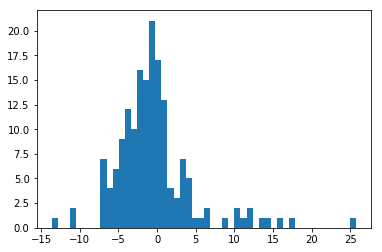

In [65]:
#An interesting way to see the error distribution

plt.hist(np.array(y_test - boston_pred), bins=50)

The cross validation score indicates which set in the cross validation performed best of all.

In the initial phase of modeling, it is understood that the model produced outputs at the above metrics. Now, using hyperparameter optimization, we can improve the predictions and it is shown below.